In [47]:
from preprocessing import *
from import_data import *
from sklearn.decomposition import FastICA
data_dir = 'DataCollection/outputs/'
ssvep_dir = data_dir + 'SSVEP/sess1/'
mi_dir = data_dir + 'MI/sess1/'
bci_dir = '../Documents/OpenBCI_GUI/Recordings/OpenBCISession_2023-02-28_12-03-49/'
col_names = ['Fp1', 'O1', 'O2','C3','C4','P3','P4','Pz']
ssvep_files = get_files(ssvep_dir)
ssvep_files = [ssvep_files[i] for i in range(len(ssvep_files)) if (i+1)%11!=0]
mi_files = get_files(mi_dir)
mi_files = [mi_files[i] for i in range(len(mi_files)) if (i+1)%6!=0]
bci_files = get_files(bci_dir)

In [48]:
ssvep_files

['DataCollection/outputs/SSVEP/sess1/2023-02-28T12_35_26.048567_10.000000000000002Hz.txt',
 'DataCollection/outputs/SSVEP/sess1/2023-02-28T12_35_26.048567_10.800000000000002Hz.txt',
 'DataCollection/outputs/SSVEP/sess1/2023-02-28T12_35_26.048567_11.600000000000003Hz.txt',
 'DataCollection/outputs/SSVEP/sess1/2023-02-28T12_35_26.048567_12.400000000000004Hz.txt',
 'DataCollection/outputs/SSVEP/sess1/2023-02-28T12_35_26.048567_13.200000000000005Hz.txt',
 'DataCollection/outputs/SSVEP/sess1/2023-02-28T12_35_26.048567_14.000000000000005Hz.txt',
 'DataCollection/outputs/SSVEP/sess1/2023-02-28T12_35_26.048567_14.800000000000006Hz.txt',
 'DataCollection/outputs/SSVEP/sess1/2023-02-28T12_35_26.048567_15.600000000000007Hz.txt',
 'DataCollection/outputs/SSVEP/sess1/2023-02-28T12_35_26.048567_8.4Hz.txt',
 'DataCollection/outputs/SSVEP/sess1/2023-02-28T12_35_26.048567_9.200000000000001Hz.txt',
 'DataCollection/outputs/SSVEP/sess1/2023-02-28T12_42_06.599375_10.000000000000002Hz.txt',
 'DataCollectio

In [49]:
eeg, Fs = process_eeg(ssvep_files[0], col_names, bci_files[8], low=1.0)

In [50]:
eeg.shape

(1000, 8)

In [51]:
def svt(data, threshold):
    min_ = np.min(data) <= -1*threshold
    #max_ = np.max(data) >= threshold
    return min_ #or max_

In [52]:
data = np.arange(-50,80,1)
print(svt(data,60))

False


In [53]:
data = svt(eeg['Fp1'], 230)

In [54]:
data

False

In [55]:
eeg, Fs = process_eeg(ssvep_files[1], col_names, bci_files[8], low=1.0)

In [56]:
ica = FastICA(n_components=8, max_iter=1000, tol=0.01, whiten='unit-variance')
eeg_np = eeg.to_numpy()
ica.fit(eeg_np)

FastICA(max_iter=1000, n_components=8, tol=0.01, whiten='unit-variance')

In [57]:
eeg_np.shape

(1000, 8)

In [58]:
'''
import matplotlib.pyplot as plt

for i in range(8):
    plt.psd(ica.components_[i], Fs=Fs)
    plt.title('Component {}'.format(i))
    plt.show()
'''

"\nimport matplotlib.pyplot as plt\n\nfor i in range(8):\n    plt.psd(ica.components_[i], Fs=Fs)\n    plt.title('Component {}'.format(i))\n    plt.show()\n"

In [59]:
blink_idx = [7]  #3
S = ica.transform(eeg_np)
S[:, blink_idx] = 0
eeg_filtered = ica.inverse_transform(S)

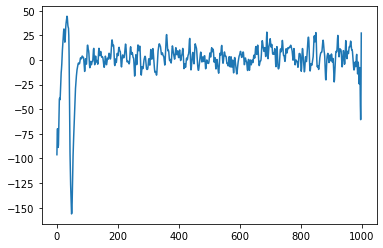

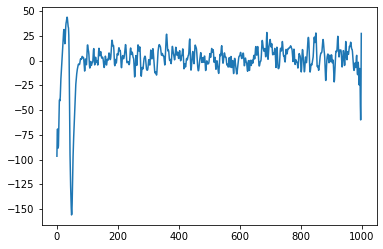

In [60]:
plt.plot(eeg_np[:,0])
plt.figure()
plt.plot(eeg_filtered[:,0]);
#plt.xlim(0,20)

In [61]:
def remove_eye_blinks(eeg):
    ica = FastICA(n_components=8, max_iter=1000, tol=0.01, whiten='unit-variance')
    eeg_np = eeg.to_numpy()
    ica.fit(eeg_np)
    S = ica.transform(eeg_np)
    for i in range(8):
        temp = S[:, i]
        S[:, i] = 0
        eeg_filtered = ica.inverse_transform(S)
        if svt(eeg_filtered[0], 100)==False:
            print('Success')
            return eeg_filtered
        print('Trying again')
        S[:, i] = temp
    return eeg

In [62]:
eeg, Fs = process_eeg(ssvep_files[1], col_names, bci_files[8], low=1.0)

In [63]:
filtered_eeg = remove_eye_blinks(eeg)

Success


Success


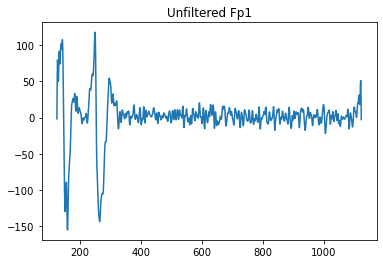

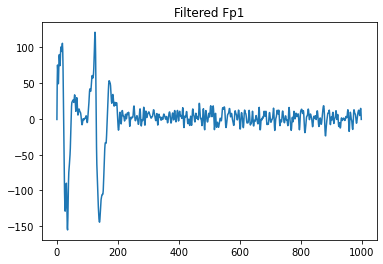

In [64]:
eeg, Fs = process_eeg(ssvep_files[0], col_names, bci_files[8], low=2.0)
filtered_eeg = remove_eye_blinks(eeg)
plt.plot(eeg['Fp1']);
plt.title('Unfiltered Fp1');
plt.figure()
plt.plot(filtered_eeg[:,0]);
plt.title('Filtered Fp1');

In [39]:
freq = 10.000200
print("{:.2f}".format(freq))

10.00
